In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D,
    MaxPooling2D,
    AveragePooling2D,
    Flatten,
    Dense,
    Dropout,
)
import pickle 
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from tensorflow.keras.utils import to_categorical


In [2]:
# load pickle file
files = ['../data_features_labels/Train_crop.pkl', '../data_features_labels/Test_crop.pkl', '../data_features_labels/Validation_crop.pkl', 
         '../data_features_labels/EA_annotated_3Blue1Brown_final.pkl', '../data_features_labels/Polish_Dataset.pkl',]
# files = ['Eastern_Asian_Dataset.pkl']
x_all_list = []
y_all_list = [] 
race_list = []
for file in files:
    
    with open(file, 'rb') as f:
        features, labels = pickle.load(f)
    
    for pic, label in zip(features, labels):
        # plt.imshow(img_gray, cmap='binary_r')
        x_all_list.append(pic)
        y_all_list.append(label)
        
        if file in ['../data_features_labels/Train_crop.pkl', '../data_features_labels/Test_crop.pkl', '../data_features_labels/Validation_crop.pkl']: 
            race_list.append('Indian')
        elif file in ['../data_features_labels/EA_annotated_3Blue1Brown_final.pkl']:
            race_list.append('EA')
        else:
            race_list.append('Polish')

In [3]:
race_list

['Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',
 'Indian',

In [4]:
X_all = np.array(x_all_list).reshape(-1, 64, 64, 1)
#one-hot encode target column
Y_all = to_categorical(np.array(y_all_list))

In [5]:
label_names = ['Not Confused', 'Confused']

In [6]:
input_dim_ = 64
num_classes = 2

model = Sequential()

# 1st convolution layer
model.add(Conv2D(64, (5, 5), activation="relu", input_shape=(input_dim_, input_dim_, 1)))
# model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(5, 5), strides=(2, 2)))

# 2nd convolution layer
# model.add(Conv2D(64, (3, 3), activation="relu"))
# model.add(Conv2D(64, (3, 3), activation="relu"))
# model.add(AveragePooling2D(pool_size=(3, 3), strides=(2, 2)))

# 3rd convolution layer
model.add(Conv2D(128, (3, 3), activation="relu"))
# model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(AveragePooling2D(pool_size=(3, 3), strides=(2, 2)))

model.add(Flatten())

# fully connected neural networks
# model.add(Dense(1024, activation="relu"))
# model.add(Dropout(0.2))
# model.add(Dense(1024, activation="relu"))
# model.add(Dropout(0.2))

model.add(Dense(num_classes, activation="softmax"))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.load_weights('../models/crop_confusion_weights_final.h5')

Metal device set to: Apple M2


2024-08-17 21:49:19.805967: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-17 21:49:19.806096: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
x_train, x_test, y_train, y_test, race_train, race_test = train_test_split(X_all, Y_all, race_list, test_size=0.2, random_state=42)
# x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.25, random_state=42)
race_test

['EA',
 'Polish',
 'Polish',
 'Indian',
 'Indian',
 'Polish',
 'Polish',
 'Indian',
 'EA',
 'Indian',
 'EA',
 'Polish',
 'EA',
 'Indian',
 'Polish',
 'EA',
 'EA',
 'Polish',
 'EA',
 'Indian',
 'Polish',
 'Indian',
 'Polish',
 'Indian',
 'Polish',
 'Polish',
 'Indian',
 'Indian',
 'EA',
 'Indian',
 'EA',
 'Polish',
 'EA',
 'Indian',
 'Indian',
 'Indian',
 'EA',
 'Polish',
 'EA',
 'EA',
 'EA',
 'Indian',
 'Indian',
 'Polish',
 'EA',
 'Indian',
 'EA',
 'Polish',
 'Indian',
 'Indian',
 'Polish',
 'Polish',
 'EA',
 'Indian',
 'Indian',
 'EA',
 'Polish',
 'Polish',
 'Indian',
 'Polish',
 'Indian',
 'EA',
 'EA',
 'EA',
 'Indian',
 'EA',
 'EA',
 'Polish',
 'EA',
 'Indian',
 'EA',
 'Indian',
 'Polish',
 'Polish',
 'Polish',
 'EA',
 'Indian',
 'EA',
 'Indian',
 'Indian',
 'EA',
 'Indian',
 'Indian',
 'Indian',
 'EA',
 'Indian',
 'Polish',
 'Indian',
 'Indian',
 'Polish',
 'EA',
 'Polish',
 'Polish',
 'Indian',
 'Polish',
 'Indian',
 'EA',
 'EA',
 'Indian',
 'EA',
 'Indian',
 'Indian',
 'Polish',

In [8]:
recall = []
for race in np.unique(race_train):
    prediction_proba = model.predict(x_test[np.where(np.array(race_test) == race)[0]])
    y_predict = prediction_proba.argmax(axis=1)
    y_true = y_test[np.where(np.array(race_test)== race)[0]].argmax(axis=1)
    recall.append(recall_score(y_true, y_predict))

2024-08-17 21:49:27.483570: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-08-17 21:49:27.523285: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [9]:
recall

[0.9249049429657795, 0.47740440324449596, 0.9863112391930836]

[1715, 712]
[582, 1378]
[1288, 1001]
[1715, 712]
[582, 1378]
[1288, 1001]
[1715, 712]
[582, 1378]
[1288, 1001]
[1715, 712]
[582, 1378]
[1288, 1001]
[1715, 712]
[582, 1378]
[1288, 1001]
[1715, 712]
[582, 1378]
[1288, 1001]
[1715, 712]
[582, 1378]
[1288, 1001]


/var/folders/5m/4tj5fx915fv1z073c22c2q7m0000gn/T/ipykernel_9224/3119905999.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(rows, cols, figsize=(16, 4), sharex=True, sharey=True)


[1715, 712]
[582, 1378]
[1288, 1001]
[1715, 712]
[582, 1378]
[1288, 1001]
[1715, 712]
[582, 1378]
[1288, 1001]


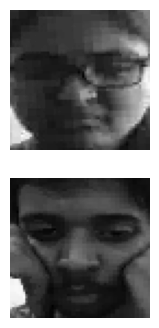

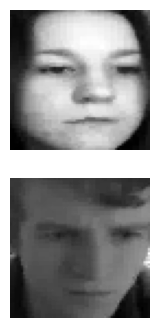

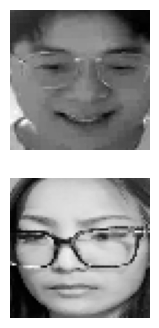

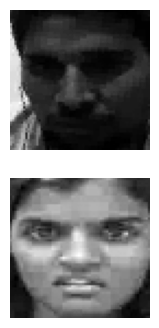

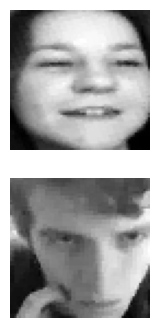

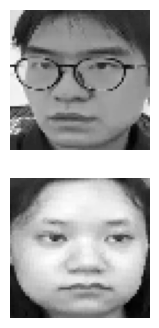

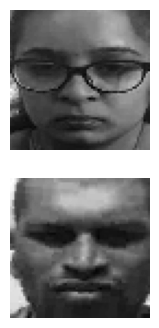

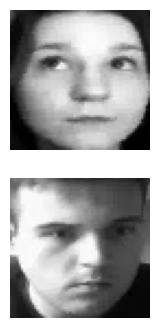

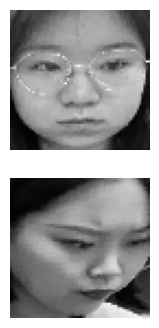

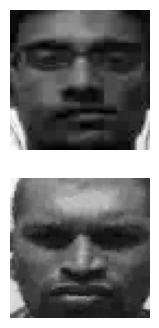

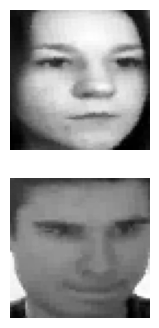

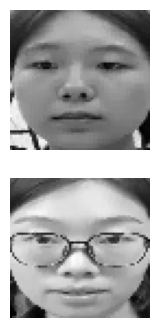

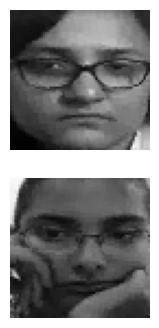

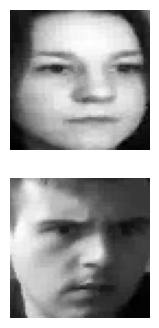

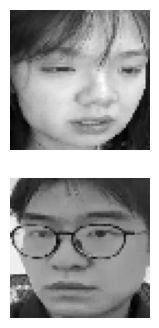

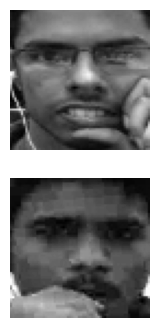

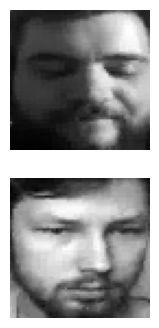

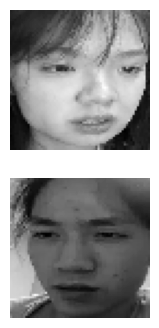

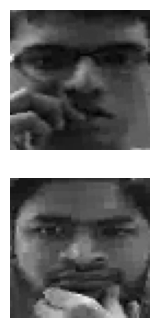

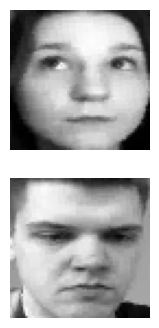

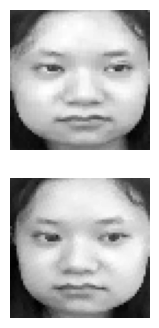

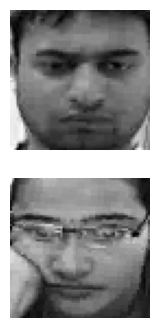

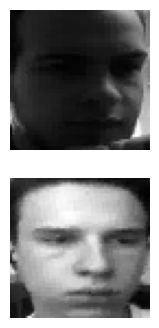

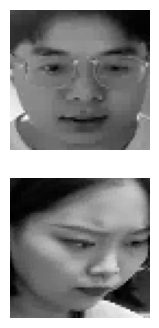

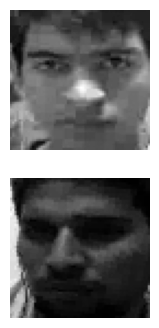

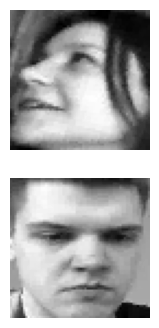

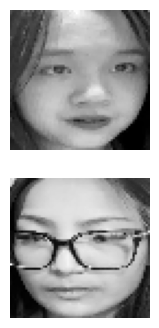

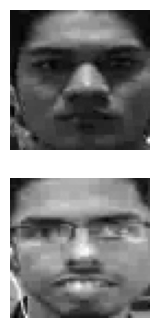

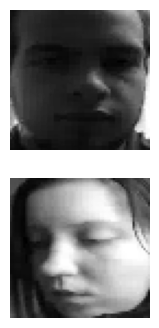

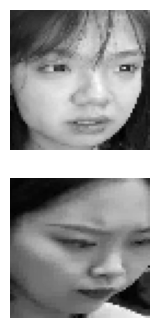

In [10]:

race_names = ['Indian', 'Polish', 'EA']
seeds = np.arange(10, 20)
for seed in seeds:
    accuracy = []
    for race in race_names:
        prediction_proba = model.predict(x_test[np.where(np.array(race_test) == race)[0]])
        y_predict = prediction_proba.argmax(axis=1)
        indices = [np.where(y_predict==i)[0] for i in np.unique(y_predict)]
        print([len(idx) for idx in indices])
    
        cols = 1
        rows = 2
        
        fig, ax = plt.subplots(rows, cols, figsize=(16, 4), sharex=True, sharey=True)
        # for each emotion (not confused, confused, very confused)
        for row in range(rows):
            # indices[row]
            # grab 6 examples
            np.random.seed(seed)
            choices = np.random.choice(indices[row], size=cols, replace=False)
            count = 0
            # for each example, I plot + write text (text = not confused, confused, very confused)
            for col in range(cols):
                try:
                
                    ax[row].imshow(x_test[np.where(np.array(race_test) == race)[0]][choices[count]], cmap='binary_r')
                    # ax[row, col].text(32, 10, label_names[y_predict[choices[count]]], color='r',
                    #                   horizontalalignment='center')
                    ax[row].axis('off')
                    count += 1
                except:
                    pass
                
        fig.savefig(f'../figure_panels/{race}_example_predict_{seed}_final.svg', bbox_inches = 'tight', dpi = 300 )
        y_true = y_test[np.where(np.array(race_test) == race)[0]].argmax(axis=1)
        accuracy.append(accuracy_score(y_true, y_predict))

In [12]:
accuracy

[0.6905644829007005, 0.9857142857142858, 0.9532546963739624]

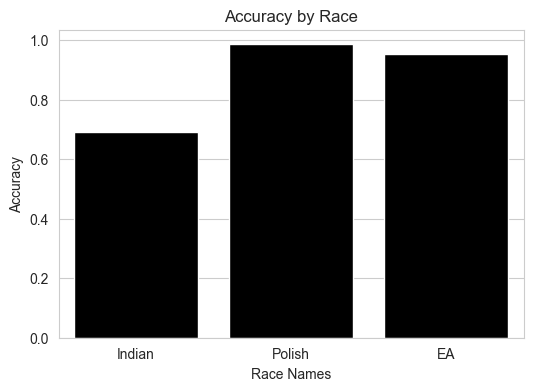

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
sns.barplot(x=np.arange(len(accuracy)), y=accuracy, color="k", ax=ax)
ax.set_xticks(ticks=np.arange(len(race_names)), labels=race_names)
ax.set_ylabel('Accuracy')
ax.set_xlabel('Race Names')
ax.set_title('Accuracy by Race')
fig.savefig('../figure_panels/figure3a_real_final.svg', bbox_inches='tight', dpi=300)

In [90]:
y_true = y_test[np.where(np.array(race_test)=='Indian')[0]].argmax(axis=1)

In [91]:
y_true, y_predict

(array([1, 1, 0, ..., 0, 1, 1]), array([0, 0, 0, ..., 0, 0, 1]))

In [92]:
# confusion matrix
conf_mat = confusion_matrix(y_true, y_predict, normalize='true')

In [93]:
print(classification_report(y_true, y_predict, target_names=label_names))

              precision    recall  f1-score   support

Not Confused       0.75      0.78      0.76      1562
    Confused       0.57      0.52      0.54       860

    accuracy                           0.69      2422
   macro avg       0.66      0.65      0.65      2422
weighted avg       0.68      0.69      0.69      2422



In [94]:
label_names = ['Not Confused', 'Confused']

<Axes: >

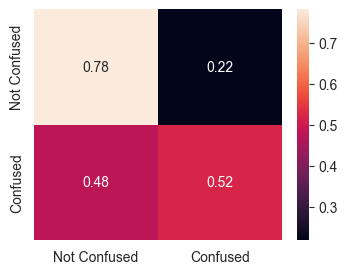

In [95]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))

sns.heatmap(conf_mat, xticklabels= label_names, 
            yticklabels= label_names, annot=True, ax=ax)
# fig.savefig('crop_confused_model_performance_all.svg', bbox_inches = 'tight', dpi=300)

In [8]:
X_train = np.array(x_train_list).reshape(-1, input_dim_, input_dim_, 1)

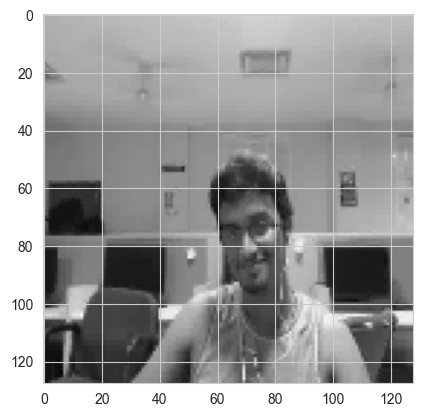

In [34]:
# X_train.shape = (5358, 48, 48, 1)
# X_test.shape = (x_test, 48, 48, 1)
# model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

In [35]:
# load pickle file
with open('Test.pkl', 'rb') as f:
    test_features, test_labels = pickle.load(f)

In [36]:
x_test_list = []
y_test_list = []
for pic, label in zip(test_features, test_labels):
    # plt.imshow(img_gray, cmap='binary_r')
    x_test_list.append(pic)
    y_test_list.append(label)

In [37]:
X_test = np.array(x_test_list).reshape(-1, input_dim_, input_dim_, 1)

In [38]:
X_test.shape

(5376, 128, 128, 1)

In [39]:
# load pickle file
with open('Validation.pkl', 'rb') as f:
    valid_features, valid_labels = pickle.load(f)

In [40]:
x_valid_list = []
y_valid_list = []
for pic, label in zip(valid_features, valid_labels):
    # plt.imshow(img_gray, cmap='binary_r')
    x_valid_list.append(pic)
    y_valid_list.append(label)

In [41]:
X_valid = np.array(x_valid_list).reshape(-1, input_dim_, input_dim_, 1)

In [42]:
X_valid.shape

(4005, 128, 128, 1)

<AxesSubplot: xlabel='y', ylabel='count'>

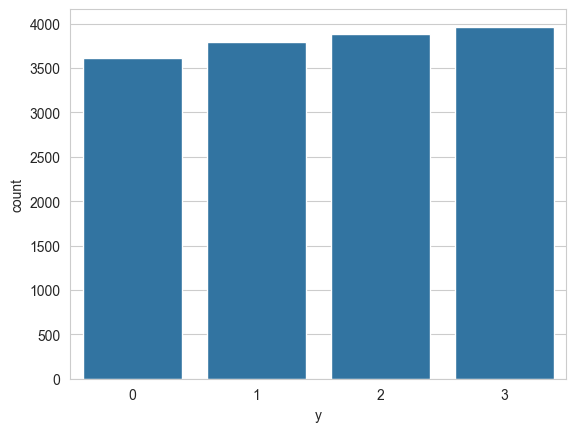

In [43]:
df = pd.DataFrame({'y': y_train_list})
sns.countplot(data=df, x='y')

<AxesSubplot: xlabel='y', ylabel='count'>

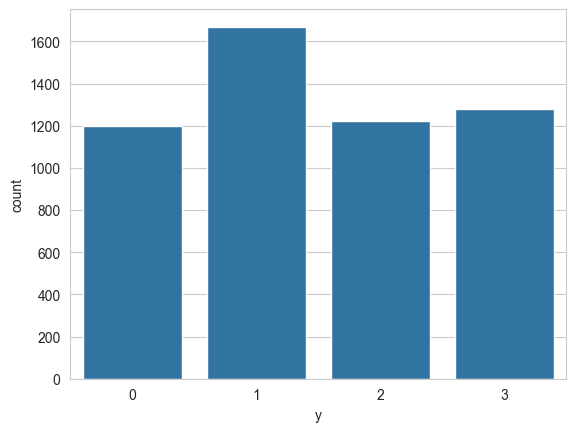

In [44]:
df = pd.DataFrame({'y': y_test_list})
sns.countplot(data=df, x='y')

<AxesSubplot: xlabel='y', ylabel='count'>

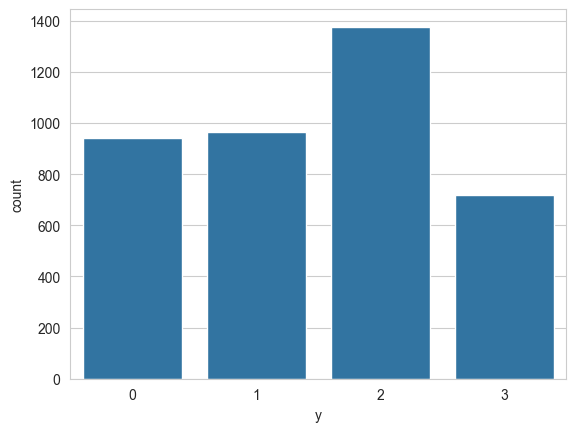

In [45]:
df = pd.DataFrame({'y': y_valid_list})
sns.countplot(data=df, x='y')

In [46]:
np.array(y_train_list).shape

(15255,)

In [73]:
from tensorflow.keras.utils import to_categorical
#one-hot encode target column
Y_train = to_categorical(np.array(y_train_list))
Y_test = to_categorical(np.array(y_test_list))
Y_validation = to_categorical(np.array(y_valid_list))
Y_train[200]

array([0., 1., 0., 0.], dtype=float32)

In [76]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)
x_train.shape, x_test.shape

((12204, 128, 128, 1), (3051, 128, 128, 1))

In [81]:
model.fit(x_train, y_train, epochs=30)

Epoch 1/30


2024-05-19 21:02:59.502562: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


382/382 [==============================] - 55s 143ms/step - loss: 5.2598 - accuracy: 0.5629
Epoch 2/30
382/382 [==============================] - 51s 134ms/step - loss: 0.6590 - accuracy: 0.7373
Epoch 3/30
382/382 [==============================] - 54s 140ms/step - loss: 0.5048 - accuracy: 0.8017
Epoch 4/30
 31/382 [=>............................] - ETA: 56s - loss: 0.3475 - accuracy: 0.8609

KeyboardInterrupt: 

In [80]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 124, 124, 64)      1664      
                                                                 
 conv2d_15 (Conv2D)          (None, 122, 122, 32)      18464     
                                                                 
 flatten_4 (Flatten)         (None, 476288)            0         
                                                                 
 dense_9 (Dense)             (None, 4)                 1905156   
                                                                 
Total params: 1,925,284
Trainable params: 1,925,284
Non-trainable params: 0
_________________________________________________________________


In [82]:
prediction_proba = model.predict(x_test)
y_predict = prediction_proba.argmax(axis=1)

 2/96 [..............................] - ETA: 7s 

2024-05-19 21:05:49.043001: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - 2s 24ms/step


In [83]:
y_predict.shape

(3051,)

In [84]:
y_true = y_test.argmax(axis=1)

In [85]:
# y_true = np.array(y_test_list)

In [86]:
# confusion matrix
conf_mat = confusion_matrix(y_true, y_predict, normalize='true')

<AxesSubplot: >

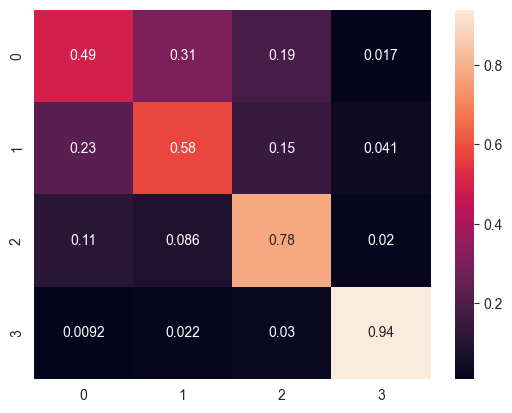

In [87]:
sns.heatmap(conf_mat, annot=True)